## Encoding

In [3]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Encoding
from sklearn.preprocessing import LabelEncoder # para realizar el Label Encoding 
from sklearn.preprocessing import OneHotEncoder  # para realizar el One-Hot Encoding

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8) 

# Gestión de warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None


En el pair programming de hoy usaremos el set de datos que guardastéis en el pair programming de normalización y estandarización.


Vuestro set de datos debería tener al menos una variable categórica, el objetivo del pair programming de hoy:
Hacer una códificación de la/las variables categóricas que tengáis en vuestro set de datos.


Recordad que lo primero que deberéis hacer es decidir su vuestras variables tienen o no orden, para que en función de esto uséis una aproximación u otra.


In [2]:
# Cargamos nuestro dataframe con los datos estandarizados y normalizados
df = pd.read_csv('../Datos/vinos_norm_estandar.csv', index_col = 0)
df.head(2)

,id,year_birth,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino,mntwines_sin_cero,mnt_wines_box
0,5524,1957,Graduation,Single,0.235696,0,0,0.307039,635,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.51089,-0.550785,0.693904,2.011116,635.0,14.026740
1,2174,1954,Graduation,Single,-0.235454,1,1,-0.383664,11,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.56872,-1.166125,-0.130463,-0.845274,11.0,3.141178


##### Tenemos dos variables predictoras categóricas.

##### Para decidir si es necesario hacer un encoding nominal u ordinal, hacemos un boxplot para ver cuánto varían sus medianas en función de la variable respuesta.

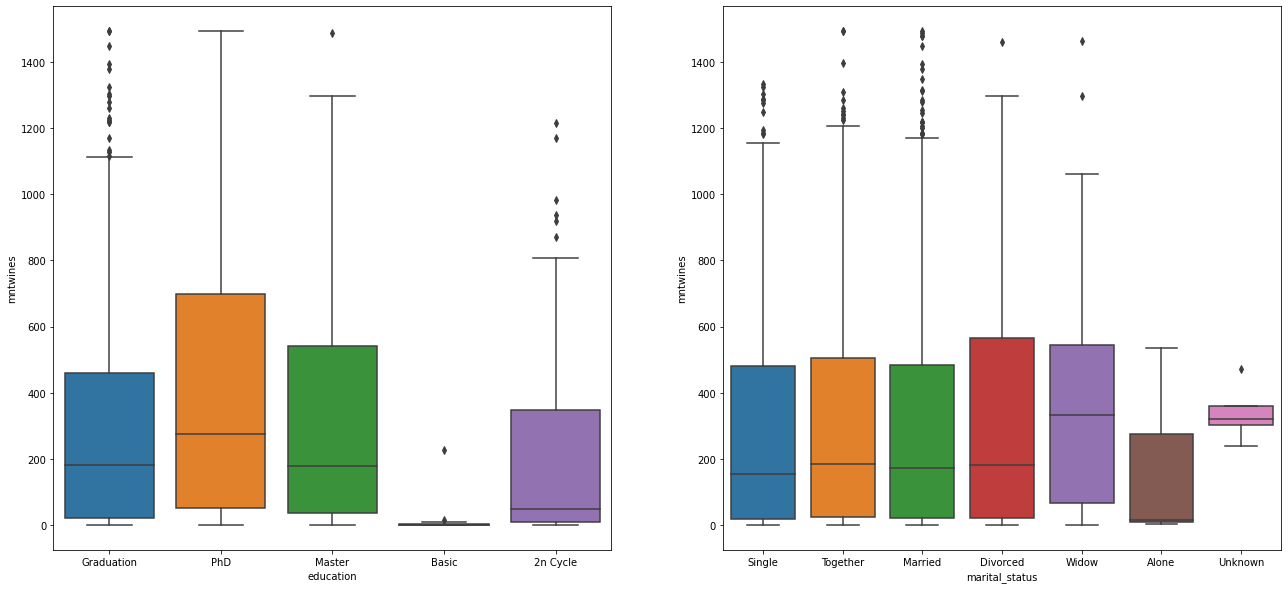

In [11]:
lista_categoricas= ['education', 'marital_status']

fig, axes = plt.subplots(1, 2, figsize=(22,10))
for i, col in enumerate(lista_categoricas):
    sns.boxplot(x=col, y='mntwines', data= df, ax=axes[i]);

> Vemos que sí varían las medianas, por lo que le aplicaremos un encoding ordinal

Encoding ordinal variable `education`

In [5]:
# Vemos qué valores únicos tiene nuestra variable
df['education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [6]:
# Le aplicaremos un map para decidir el peso que le asignaremos a cada categoría
map_education = {'Basic':0, '2n Cycle':1, 'Graduation':2 ,'Master':2, 'PhD':3}

In [7]:
df['education_enc'] = df['education'].map(map_education)

In [8]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino,mntwines_sin_cero,mnt_wines_box,education_enc
0,5524,1957,Graduation,Single,0.235696,0,0,0.307039,635,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,2.011116,635.0,14.026740,2
1,2174,1954,Graduation,Single,-0.235454,1,1,-0.383664,11,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.845274,11.0,3.141178,2
2,4141,1965,Graduation,Together,0.773999,0,0,-0.798086,426,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0.142339,426.0,12.485975,2
3,6182,1984,Graduation,Together,-1.022355,1,0,-0.798086,11,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.768394,11.0,3.141178,2
4,5324,1981,PhD,Married,0.241888,1,0,1.550305,173,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.156310,173.0,9.459458,3


Encoding ordinal variable `marital_status`

In [12]:
df['marital_status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Unknown'], dtype=object)

In [13]:
# También le aplicaremos un map para decidir el peso que le asignaremos a cada categoría
map_marital = {'Alone':0, 'Single':1, 'Together':1 ,'Married':1, 'Divorced':1, 'Unknown':2, 'Widow':3}

In [14]:
df['marital_status_enc'] = df['marital_status'].map(map_marital)

In [15]:
# Vemos cómo se queda nuestro dataframe
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino,mntwines_sin_cero,mnt_wines_box,education_enc,marital_status_enc
0,5524,1957,Graduation,Single,0.235696,0,0,0.307039,635,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,2.011116,635.0,14.026740,2,1
1,2174,1954,Graduation,Single,-0.235454,1,1,-0.383664,11,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.845274,11.0,3.141178,2,1
2,4141,1965,Graduation,Together,0.773999,0,0,-0.798086,426,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0.142339,426.0,12.485975,2,1
3,6182,1984,Graduation,Together,-1.022355,1,0,-0.798086,11,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.768394,11.0,3.141178,2,1
4,5324,1981,PhD,Married,0.241888,1,0,1.550305,173,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.156310,173.0,9.459458,3,1


In [16]:
# Eliminamos las columnas no codificadas y guardamos en un nuevo dataframe
df_enc_ordinal = df.drop(['education', 'marital_status'], axis=1)
df_enc_ordinal.head()

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino,mntwines_sin_cero,mnt_wines_box,education_enc,marital_status_enc
0,5524,1957,0.235696,0,0,0.307039,635,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,2.011116,635.0,14.026740,2,1
1,2174,1954,-0.235454,1,1,-0.383664,11,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.845274,11.0,3.141178,2,1
2,4141,1965,0.773999,0,0,-0.798086,426,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0.142339,426.0,12.485975,2,1
3,6182,1984,-1.022355,1,0,-0.798086,11,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.768394,11.0,3.141178,2,1
4,5324,1981,0.241888,1,0,1.550305,173,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.156310,173.0,9.459458,3,1


In [18]:
# Guardamos nuestro dataframe en csv con este tipo de encoding
df_enc_ordinal.to_csv('../Datos/vinos_encoding_map_map.csv')

##### Si recordamos, en los resultados del ANOVA vimos que la variable 'marital_status' no afectaba a nuestra variable respuesta, por lo que podríamos realizar dos modelos: uno con la columna 'marital_status' con un encoding ordinal y otro con esa variable con encoding nominal.

>Probaremos realizando el encoding nominal para la variable 'marital_status'

In [19]:
# Utilizaremosel metodo get_dummies para ello
dummies_marital = pd.get_dummies(df["marital_status"], prefix_sep = "_", prefix = "marital", dtype = int)
dummies_marital.head()

,marital_Alone,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Unknown,marital_Widow
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0


In [20]:
# Concatenamos las nuevas columnas con nuestro dataframe original
df_dummies = pd.concat([df, dummies_marital], axis = 1)
df_dummies.head(2)

,id,year_birth,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino,mntwines_sin_cero,mnt_wines_box,education_enc,marital_status_enc,marital_Alone,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Unknown,marital_Widow
0,5524,1957,Graduation,Single,0.235696,0,0,0.307039,635,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.51089,-0.550785,0.693904,2.011116,635.0,14.026740,2,1,0,0,0,1,0,0,0
1,2174,1954,Graduation,Single,-0.235454,1,1,-0.383664,11,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.56872,-1.166125,-0.130463,-0.845274,11.0,3.141178,2,1,0,0,0,1,0,0,0


In [21]:
# Eliminamos las columnas no codificadas y la de marital_status con encoding ordinal
df_dummies.drop(['marital_status', 'education', 'marital_status_enc'], axis=1, inplace=True)
df_dummies.head(2)

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino,mntwines_sin_cero,mnt_wines_box,education_enc,marital_Alone,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Unknown,marital_Widow
0,5524,1957,0.235696,0,0,0.307039,635,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.51089,-0.550785,0.693904,2.011116,635.0,14.026740,2,0,0,0,1,0,0,0
1,2174,1954,-0.235454,1,1,-0.383664,11,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.56872,-1.166125,-0.130463,-0.845274,11.0,3.141178,2,0,0,0,1,0,0,0


In [22]:
# Guardamos nuestro dataframe en csv con una variable codificada como ordinal y la otra nominal
df_dummies.to_csv('../Datos/vinos_encoding_map_dummies.csv')